In [12]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [13]:
#Leemos el CSV
nlp = pd.read_csv('data/train.csv')

In [14]:
nlp.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [15]:
nlp['legth_tweet'] = nlp['text'].str.len()
nlp['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [16]:
nlp.head(10)

,id,keyword,location,text,target,legth_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


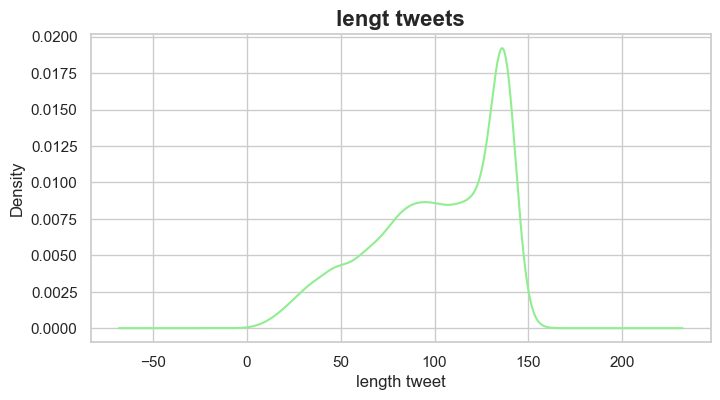

In [17]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('lengt tweets',fontsize=16,fontweight='bold')
ax.set_xlabel('length tweet')
nlp['legth_tweet'].plot.kde(color='lightgreen', figsize=(8, 4))
plt.show()

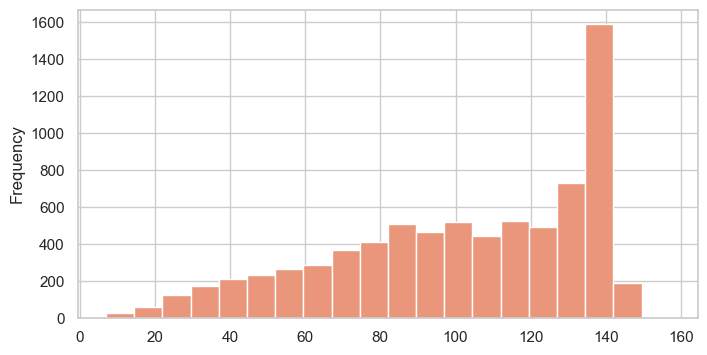

In [18]:
fig=plt.figure()
ax = fig.add_subplot(111)

#plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
#ax.set_xlabel('year of award')
nlp['legth_tweet'].plot.hist(color='darksalmon', figsize=(8, 4), bins=20)

plt.show()

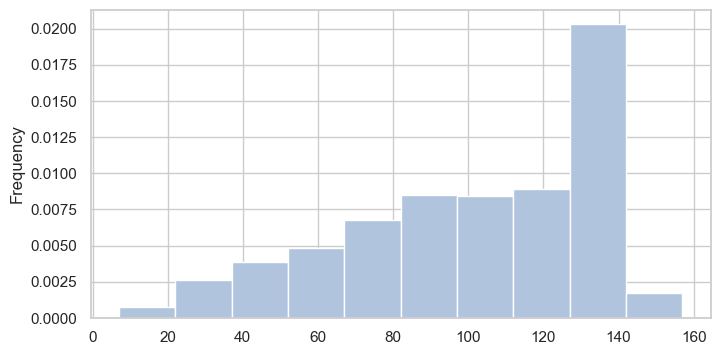

In [19]:
nlp['legth_tweet'].plot.hist(color='lightsteelblue', figsize=(8, 4), density=True)
nlp['legth_tweet'].plot.kde(color='darkblue', ax=ax, secondary_y=True)

plt.show()

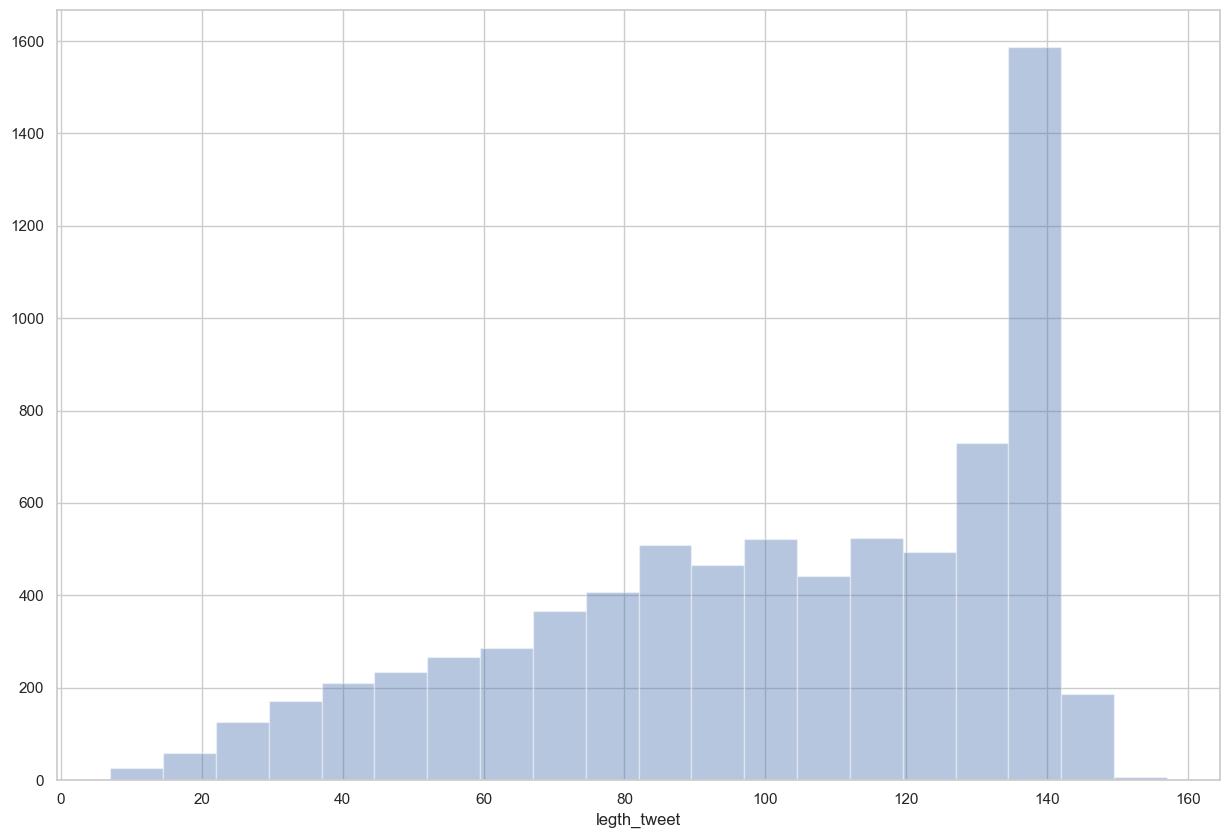

In [20]:
sns.distplot(nlp['legth_tweet'], kde=False, bins=20)


In [23]:
grouped = nlp.groupby(['legth_tweet','target'])[['id']].count().reset_index()
grouped.rename(columns={'id':'cant_veces'}, inplace=True)
grouped.shape

(281, 3)

In [24]:
grouped.tail(50)

,legth_tweet,target,cant_veces
231,127,1,29
232,128,0,42
233,128,1,30
234,129,0,49
235,129,1,30
236,130,0,55
237,130,1,37
238,131,0,51
239,131,1,32
240,132,0,67


In [25]:
grouped['target'].value_counts()

0    146
1    135
Name: target, dtype: int64

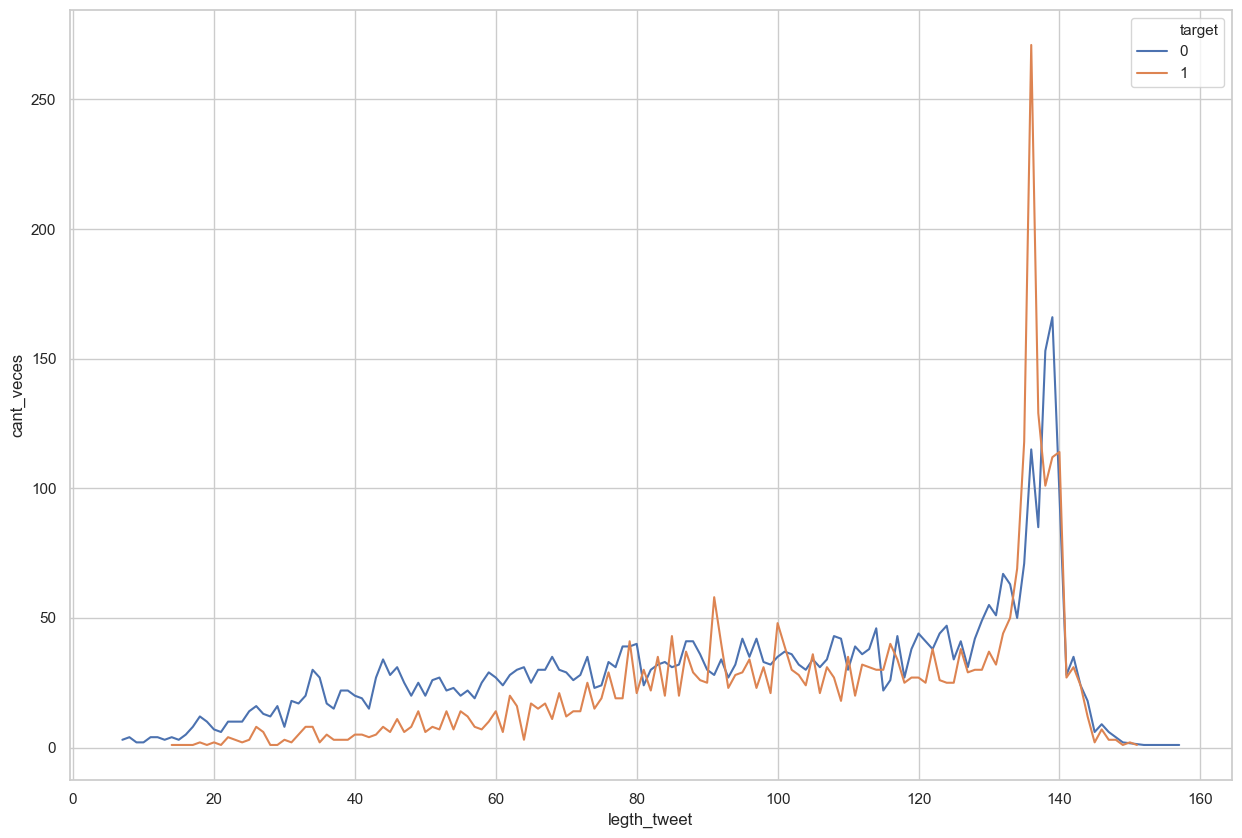

In [26]:
sns.lineplot(x="legth_tweet", y="cant_veces",hue="target",data=grouped)

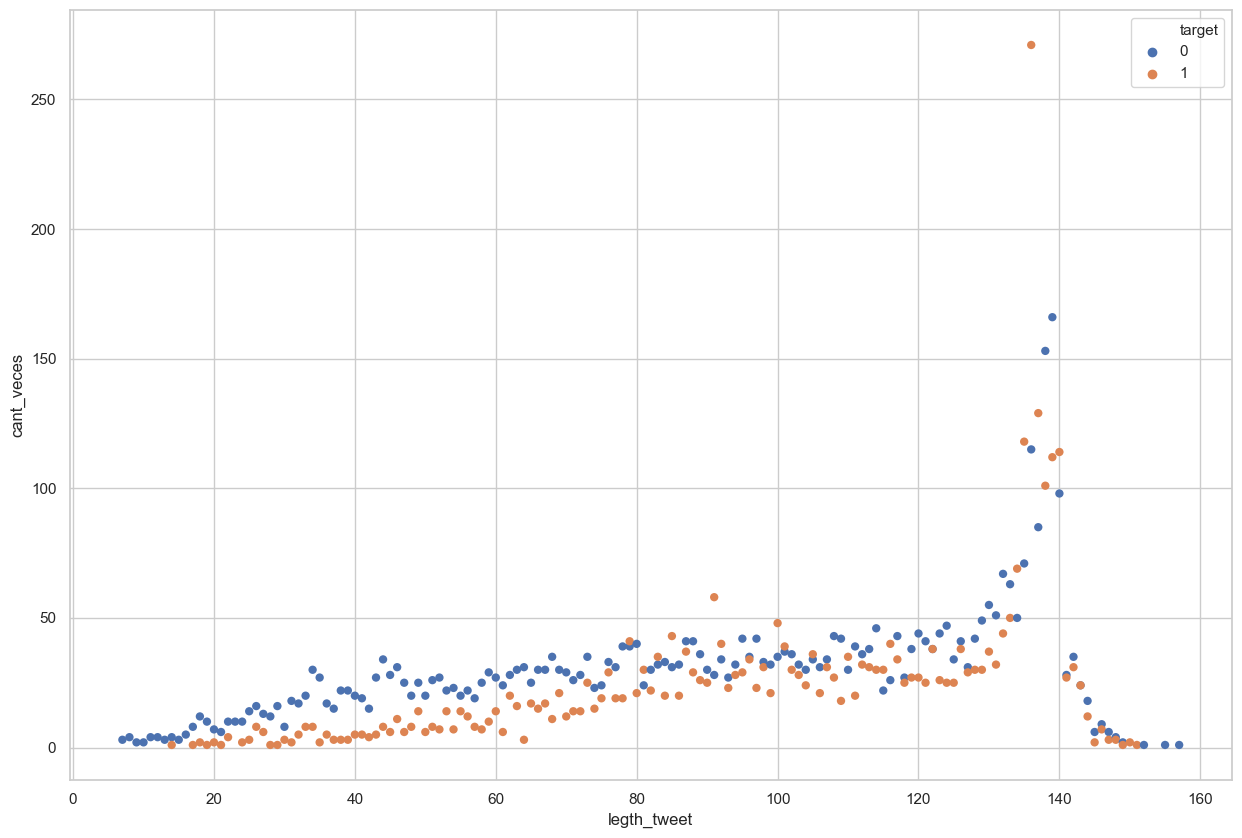

In [27]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="legth_tweet", y="cant_veces", hue="target", sizes=(1, 8), linewidth=0, data=grouped)

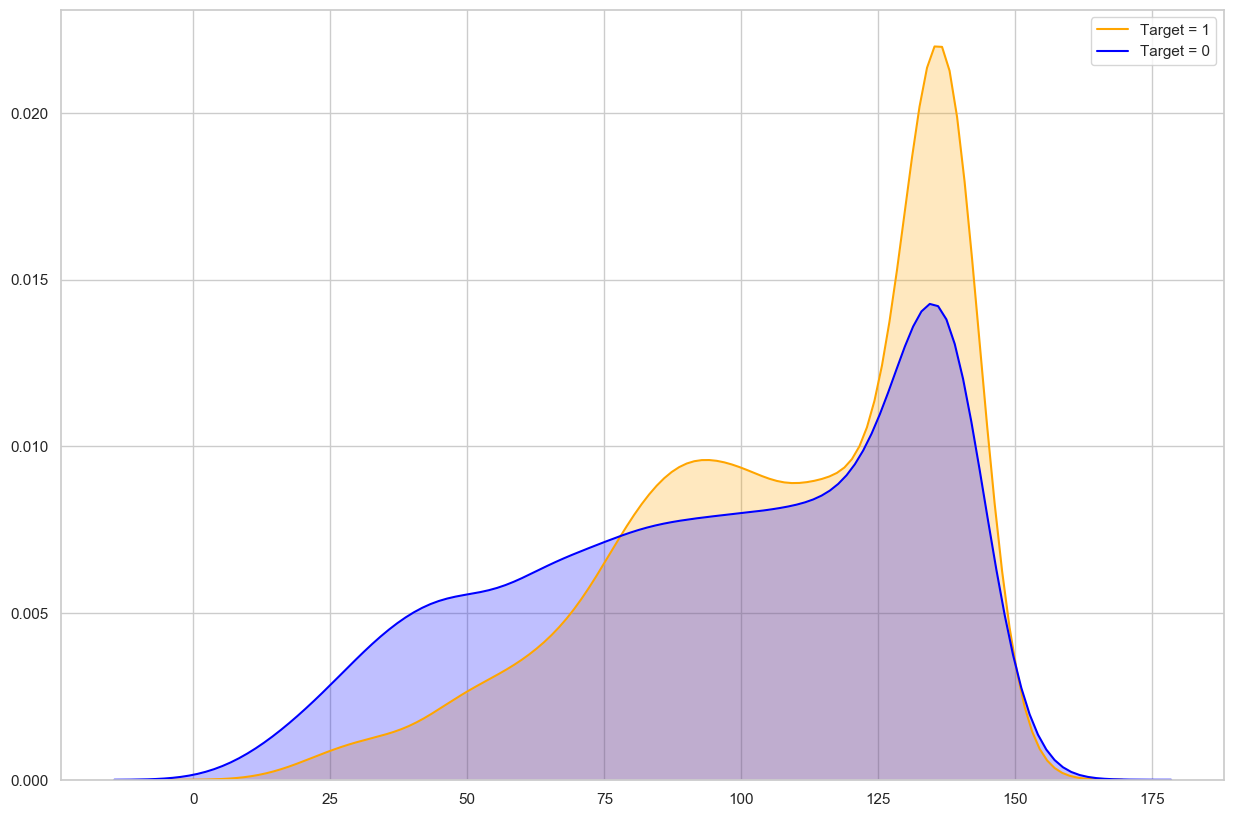

In [31]:
g = sns.kdeplot(nlp[nlp['target']==1]['legth_tweet'], color='orange', label='Target = 1', shade=True)
g = sns.kdeplot(nlp[nlp['target']==0]['legth_tweet'], color='blue', label='Target = 0', shade=True)

In [65]:
target1 = grouped.loc[grouped['target']==1, :]
target0 = grouped.loc[grouped['target']==0, :]

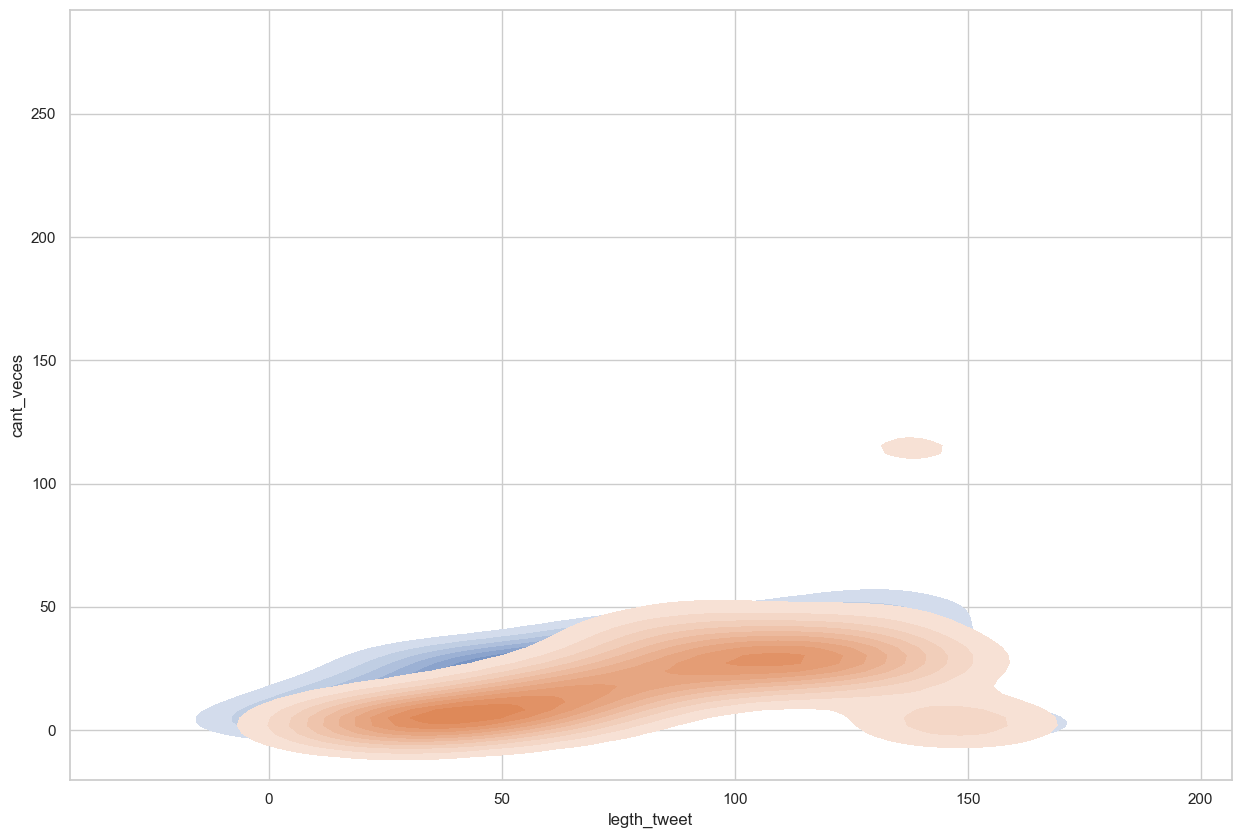

In [67]:
ax = sns.kdeplot(target0.legth_tweet, target0.cant_veces, shade=True, shade_lowest=False)
ax = sns.kdeplot(target1.legth_tweet, target1.cant_veces, shade=True, shade_lowest=False)